## Cargamos los datos

In [176]:
import tensorflow.keras as tf_keras
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt

In [177]:
(train_data, train_labels),(test_data, test_labels) = boston_housing.load_data()

In [178]:
print(train_data.shape)
print(train_labels.shape)

(404, 13)
(404,)


In [179]:
print(train_data[0])
print(train_labels[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


## Normalizamos los datos

> Dato que desconocia: <br>
> Se usa la media y std de el de entranamiento y no de test, porque produce datalake

In [180]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = (train_data - mean)/std
test_data = (test_data - mean)/std

## Modelo

In [181]:
train_data.shape

(404, 13)

In [182]:
def build_model(input_data):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(input_data,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer=optimizers.RMSprop(), loss='mse', metrics=['mae'])
    
    return model

In [183]:
k = 4
num_val_samples = len(train_data)//k
num_epochs = 80
all_histories = []

Tengo entendido que para neuronas usar cross validation no es como lo mejor, debido a que son datos grandes, solo es aplicable a datos pequeños, pero para eso creo que es mejor usar machine learning

In [184]:
for i in range(k):
    print('Fold: ',i)
    val_data = train_data[i*num_val_samples: (i+1) * num_val_samples]
    val_labels = train_labels[i*num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0)    
    partial_train_labels = np.concatenate([train_labels[:i*num_val_samples], train_labels[(i+1)*num_val_samples:]], axis=0)
    
    model = build_model(13)   
    hist = model.fit(partial_train_data, partial_train_labels, epochs=num_epochs, batch_size=16, validation_data=(val_data, val_labels))
    
    all_histories.append(hist.history['val_mae'])
    

Fold:  0
Epoch 1/80


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 503.8204 - mae: 21.1242 - val_loss: 447.5879 - val_mae: 19.1467
Epoch 2/80
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 395.1089 - mae: 18.3331 - val_loss: 313.2344 - val_mae: 15.8514
Epoch 3/80
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 301.8428 - mae: 15.5673 - val_loss: 178.6030 - val_mae: 11.6216
Epoch 4/80
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 159.8363 - mae: 10.9052 - val_loss: 85.3237 - val_mae: 7.3303
Epoch 5/80
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 94.3570 - mae: 7.4201 - val_loss: 48.7420 - val_mae: 5.1025
Epoch 6/80
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 57.9145 - mae: 5.6161 - val_loss: 36.1220 - val_mae: 4.1173
Epoch 7/80
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34.4607 - mae: 4.5859 - val_loss: 29.5526 - val_mae: 3.5919
Epoch 8/80
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.3984 - mae: 4.3461 - val_loss: 26.2782 - val_mae: 3.3491
Epoch 9/80
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - 

In [185]:
all_mea_avg = pd.DataFrame(all_histories).mean(axis=0)
all_mea_avg

0     19.512501
1     16.182451
2     12.117789
3      8.308338
4      6.101944
        ...    
75     2.366524
76     2.351086
77     2.322896
78     2.306400
79     2.376272
Length: 80, dtype: float64

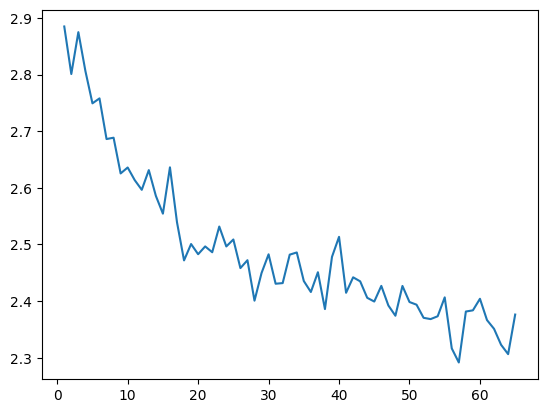

In [186]:
plt.plot(range(1,len(all_mea_avg[15:])+1), all_mea_avg[15:])
plt.show()

In [187]:
model.evaluate(test_data, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.9154 - mae: 2.5188


[19.452619552612305, 2.7166080474853516]